# Задания

* $f(x)=x^3+3x^2-72x+1$ Найти производную первого порядка и нарисовать график
* $f(x)=ln(2x-1)$ Найти производную 10 порядка и нарисовать график
* $f(x,y)=x^2+y^2$ Найти производную по х, по y и нарисовать графики

PS Видео решения дз не будет, смысла не вижу

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from IPython.display import display
from sympy import * #sempai (•̀_•́ ) ԅ(´ ❥ `ԅ)
init_printing()
x, y = symbols('x y')
f1 = x**3 + 3 * x**2 - 72 * x + 1
df1 = diff(f1)
df1

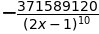

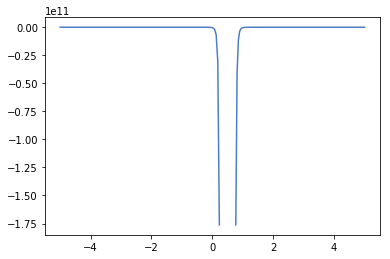

In [2]:
f2 = ln(2*x - 1)
df2_10 = diff(f2, x, 10)
display(df2_10)

def get_limits(interval):
    left, right = interval.split(',')
    left_border = left[0]
    right_border = right[-1]
    if left_border == '(':
        left_border = False
    else:
        left_border = True
    if right_border == '(':
        right_border = False
    else:
        right_border = True
    left = float(left[1:])
    right = float(right[:-1])
    return {'left': (left_border, left), 'right': (right_border, right)}
    
def add_plot(x_interval, symbol, expr):
    limits = get_limits(x_interval)
    left = limits['left'][0]
    right = limits['right'][0]
    x_from = limits['left'][1]
    x_to = limits['right'][1]
    if left and right:
        x = np.arange(x_from, x_to+0.01, (x_to - x_from)/100)
    elif left and not right:
        x = np.arange(x_from, x_to, (x_to - 0.01 - x_from)/100)
    elif not left and right:
        x = np.arange(x_from+0.01, x_to+0.01, (x_to - x_from - 0.01)/100)
    else:
        x = np.arange(x_from+0.01, x_to, (x_to - x_from - 0.02)/100)
    y = np.empty_like(x)
    for index, x_val in enumerate(x):
        y[index] = expr.subs(symbol, x_val)
    plt.plot(x, y, color='#507dc7')

add_plot('[-5, 0.23)', x, df2_10)
add_plot('(0.76, 5]', x, df2_10)
plt.show()

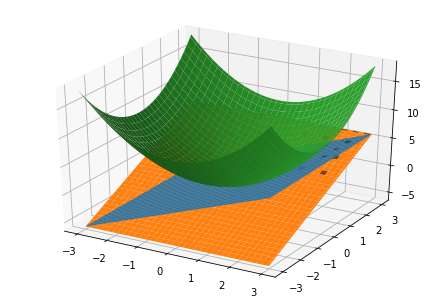

In [3]:
f3 = x**2 + y**2
df3_x = diff(f3, x)
df3_y = diff(f3, y)
display(df3_x)
display(df3_y)

def add_plot(ax, expr, symbols, x_from, x_to, y_from, y_to):
    x = np.arange(x_from, x_to+0.01, (x_to - x_from)/100)
    y = np.arange(y_from, y_to+0.01, (y_to - y_from)/100)
    x, y = np.meshgrid(x, y)
    z = np.empty_like(x)
    for i in range(z.shape[0]):
        for j in range(z.shape[0]):
            z[i][j] = expr.subs({symbols[0] : x[i, j], symbols[1] : y[i, j]})
    ax.plot_surface(x, y, z)

fig = plt.figure()
ax = Axes3D(fig)
x_from, x_to = -3, 3
y_from, y_to = -3, 3
add_plot(ax, df3_x, [x, y], x_from, x_to, y_from, y_to)
add_plot(ax, df3_y, [x, y], x_from, x_to, y_from, y_to)
add_plot(ax, f3, [x, y], x_from, x_to, y_from, y_to)
plt.show()